# Task: Covid-19 Data Analysis
### This notebook is used to understand the comprehension of Data Analysis techniques using Pandas library.

### Data Source: 
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports

### File naming convention

MM-DD-YYYY.csv in UTC.

### Field description

- Province_State: China - province name; US/Canada/Australia/ - city name, state/province name; Others - name of the event (e.g., "Diamond Princess" cruise ship); other countries - blank.

- Country_Region: country/region name conforming to WHO (will be updated).

- Last_Update: MM/DD/YYYY HH:mm (24 hour format, in UTC).

- Confirmed: the number of confirmed cases. For Hubei Province: from Feb 13 (GMT +8), we report both clinically diagnosed and lab-confirmed cases. For lab-confirmed cases only (Before Feb 17), please refer to who_covid_19_situation_reports. For Italy, diagnosis standard might be changed since Feb 27 to "slow the growth of new case numbers." (Source)

- Deaths: the number of deaths.

- Recovered: the number of recovered cases.

### Question 1

#### Read the dataset

In [40]:
import pandas as pd

data= pd.read_csv("01-05-2021.csv")
data


,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-01-06 05:22:16,33.93911,67.709953,53011,2237,42666,8108,Afghanistan,136.175852,4.219879
1,NaN,NaN,NaN,Albania,2021-01-06 05:22:16,41.15330,20.168300,60283,1210,35551,23522,Albania,2094.759886,2.007199
2,NaN,NaN,NaN,Algeria,2021-01-06 05:22:16,28.03390,1.659600,100873,2782,68185,29906,Algeria,230.035577,2.757923
3,NaN,NaN,NaN,Andorra,2021-01-06 05:22:16,42.50630,1.521800,8308,84,7585,639,Andorra,10752.604672,1.011074
4,NaN,NaN,NaN,Angola,2021-01-06 05:22:16,-11.20270,17.873900,17756,410,11376,5970,Angola,54.024996,2.309079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4007,NaN,NaN,Unknown,Ukraine,2021-01-06 05:22:16,NaN,NaN,0,0,0,0,"Unknown, Ukraine",0.000000,0.000000
4008,NaN,NaN,NaN,Nauru,2021-01-06 05:22:16,-0.52280,166.931500,0,0,0,0,Nauru,0.000000,0.000000
4009,NaN,NaN,Niue,New Zealand,2021-01-06 05:22:16,-19.05440,-169.867200,0,0,0,0,"Niue, New Zealand",0.000000,0.000000
4010,NaN,NaN,NaN,Tuvalu,2021-01-06 05:22:16,-7.10950,177.649300,0,0,0,0,Tuvalu,0.000000,0.000000


#### Display the top 5 rows in the data

In [41]:
data.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-01-06 05:22:16,33.93911,67.709953,53011,2237,42666,8108,Afghanistan,136.175852,4.219879
1,NaN,NaN,NaN,Albania,2021-01-06 05:22:16,41.15330,20.168300,60283,1210,35551,23522,Albania,2094.759886,2.007199
2,NaN,NaN,NaN,Algeria,2021-01-06 05:22:16,28.03390,1.659600,100873,2782,68185,29906,Algeria,230.035577,2.757923
3,NaN,NaN,NaN,Andorra,2021-01-06 05:22:16,42.50630,1.521800,8308,84,7585,639,Andorra,10752.604672,1.011074
4,NaN,NaN,NaN,Angola,2021-01-06 05:22:16,-11.20270,17.873900,17756,410,11376,5970,Angola,54.024996,2.309079


#### Show the information of the dataset

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4012 entries, 0 to 4011
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3265 non-null   float64
 1   Admin2               3270 non-null   object 
 2   Province_State       3834 non-null   object 
 3   Country_Region       4012 non-null   object 
 4   Last_Update          4012 non-null   object 
 5   Lat                  3923 non-null   float64
 6   Long_                3923 non-null   float64
 7   Confirmed            4012 non-null   int64  
 8   Deaths               4012 non-null   int64  
 9   Recovered            4012 non-null   int64  
 10  Active               4012 non-null   int64  
 11  Combined_Key         4012 non-null   object 
 12  Incident_Rate        3923 non-null   float64
 13  Case_Fatality_Ratio  3964 non-null   float64
dtypes: float64(5), int64(4), object(5)
memory usage: 438.9+ KB


#### Show the sum of missing values of features in the dataset

In [43]:
data.isna().sum()

FIPS                   747
Admin2                 742
Province_State         178
Country_Region           0
Last_Update              0
Lat                     89
Long_                   89
Confirmed                0
Deaths                   0
Recovered                0
Active                   0
Combined_Key             0
Incident_Rate           89
Case_Fatality_Ratio     48
dtype: int64

### Question 2

#### Show the number of Confirmed cases by Country

In [68]:
confirmed_df =data.groupby(['Country_Region']).Confirmed.sum().reset_index()
confirmed_df

,Country_Region,Confirmed
0,Afghanistan,53011
1,Albania,60283
2,Algeria,100873
3,Andorra,8308
4,Angola,17756
...,...,...
195,West Bank and Gaza,143169
196,Winter Olympics 2022,0
197,Yemen,2101
198,Zambia,22645


#### Show the number of Deaths by Country

In [69]:
death_df= data.groupby(['Country_Region']).Deaths.sum().reset_index()
death_df

,Country_Region,Deaths
0,Afghanistan,2237
1,Albania,1210
2,Algeria,2782
3,Andorra,84
4,Angola,410
...,...,...
195,West Bank and Gaza,1505
196,Winter Olympics 2022,0
197,Yemen,610
198,Zambia,412


#### Show the number of Recovered cases by Country

In [70]:
recovered_df= data.groupby(['Country_Region']).Recovered.sum().reset_index()
recovered_df

,Country_Region,Recovered
0,Afghanistan,42666
1,Albania,35551
2,Algeria,68185
3,Andorra,7585
4,Angola,11376
...,...,...
195,West Bank and Gaza,124525
196,Winter Olympics 2022,0
197,Yemen,1401
198,Zambia,19526


#### Show the number of Active Cases by Country

In [47]:
active_df = data.groupby(['Country_Region']).Active.sum().reset_index()
active_df

,Country_Region,Active
0,Afghanistan,8108
1,Albania,23522
2,Algeria,29906
3,Andorra,639
4,Angola,5970
...,...,...
195,West Bank and Gaza,17139
196,Winter Olympics 2022,0
197,Yemen,90
198,Zambia,2707


#### Show the latest number of Confirmed, Deaths, Recovered and Active cases Country-wise

In [71]:
df1 =data.groupby(['Country_Region']).Confirmed.sum().reset_index()
df2= data.groupby(['Country_Region']).Deaths.sum().reset_index()
df3= data.groupby(['Country_Region']).Recovered.sum().reset_index()
df4 = data.groupby(['Country_Region']).Active.sum().reset_index()

data2= pd.merge(df1,df2,on='Country_Region')
data3=pd.merge(data2,df3,on='Country_Region')
data4=pd.merge(data3,df4,on='Country_Region')

data4

,Country_Region,Confirmed,Deaths,Recovered,Active
0,Afghanistan,53011,2237,42666,8108
1,Albania,60283,1210,35551,23522
2,Algeria,100873,2782,68185,29906
3,Andorra,8308,84,7585,639
4,Angola,17756,410,11376,5970
...,...,...,...,...,...
195,West Bank and Gaza,143169,1505,124525,17139
196,Winter Olympics 2022,0,0,0,0
197,Yemen,2101,610,1401,90
198,Zambia,22645,412,19526,2707


### Question 3

### Show the countries with no recovered cases

In [72]:
no_recovery_df= data.groupby(['Country_Region']).Recovered.sum().reset_index()
no_recovery_df[no_recovery_df['Recovered'] == 0]


,Country_Region,Recovered
5,Antarctica,0
17,Belgium,0
92,Kiribati,0
93,"Korea, North",0
125,Nauru,0
136,Palau,0
156,Serbia,0
169,Summer Olympics 2020,0
171,Sweden,0
180,Tonga,0


#### Show the countries with no confirmed cases

In [73]:
no_confirmed_df =data.groupby(['Country_Region']).Confirmed.sum().reset_index()
no_confirmed_df[no_confirmed_df['Confirmed']==0]

,Country_Region,Confirmed
5,Antarctica,0
92,Kiribati,0
93,"Korea, North",0
125,Nauru,0
136,Palau,0
169,Summer Olympics 2020,0
180,Tonga,0
184,Tuvalu,0
196,Winter Olympics 2022,0


#### Show the countries with no deaths

In [74]:
no_deaths_df= data.groupby(['Country_Region']).Deaths.sum().reset_index()
no_deaths_df[no_deaths_df['Deaths']==0]
no_deaths_df

,Country_Region,Deaths
0,Afghanistan,2237
1,Albania,1210
2,Algeria,2782
3,Andorra,84
4,Angola,410
...,...,...
195,West Bank and Gaza,1505
196,Winter Olympics 2022,0
197,Yemen,610
198,Zambia,412


In [75]:
no_deaths_df = data4[(data4['Deaths']== 0) & (data4['Recovered'] != 0) & (data4['Recovered'] != 0)]
no_deaths_df.drop('Active',axis=1)

,Country_Region,Confirmed,Deaths,Recovered
20,Bhutan,734,0,456
31,Cambodia,383,0,362
51,Dominica,88,0,83
76,Holy See,27,0,15
98,Laos,41,0,40
114,Marshall Islands,4,0,4
148,Saint Kitts and Nevis,33,0,31
150,Saint Vincent and the Grenadines,133,0,100
151,Samoa,2,0,2
162,Solomon Islands,17,0,5


### Question 4

#### Show the Top 10 countries with Confirmed cases

In [78]:
print(data.columns)
df1=data.groupby(['Country_Region','Last_Update']).Confirmed.sum().reset_index()
df2= data.groupby(['Country_Region','Last_Update']).Deaths.sum().reset_index()
df3= data.groupby(['Country_Region','Last_Update']).Recovered.sum().reset_index()
df4 = data.groupby(['Country_Region','Last_Update']).Active.sum().reset_index()

data2= pd.merge(df1,df2,on=['Country_Region','Last_Update'])
data3=pd.merge(data2,df3,on=['Country_Region','Last_Update'])
data4=pd.merge(data3,df4,on=['Country_Region','Last_Update'])

data4

df= data4.drop('Active',axis=1)
sorted_confirmed_df=df.sort_values(by='Confirmed',ascending=False).head(10)
sorted_confirmed_df

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')


,Country_Region,Last_Update,Confirmed,Deaths,Recovered
189,US,2021-01-06 05:22:16,21291020,362421,0
81,India,2021-01-06 05:22:16,10374932,150114,9997272
24,Brazil,2021-01-06 05:22:16,7819636,197930,6994845
147,Russia,2021-01-06 05:22:16,3250713,58706,2635242
194,United Kingdom,2021-01-06 05:22:16,2782676,99432,6386
64,France,2021-01-06 05:22:16,2737892,66416,203425
184,Turkey,2021-01-06 05:22:16,2270101,21879,2155338
87,Italy,2021-01-06 05:22:16,2181619,76329,1536129
167,Spain,2021-01-06 05:22:16,1982544,51430,150376
68,Germany,2021-01-06 05:22:16,1788268,35518,1472311


#### Show the Top 10 Countries with Active cases

In [79]:
sorted_active_df=data4.sort_values(by='Active',ascending=False).head(10)
sorted_active_df

,Country_Region,Last_Update,Confirmed,Deaths,Recovered,Active
189,US,2021-01-06 05:22:16,21291020,362421,0,20880151
194,United Kingdom,2021-01-06 05:22:16,2782676,99432,6386,2699899
64,France,2021-01-06 05:22:16,2737892,66416,203425,2468051
167,Spain,2021-01-06 05:22:16,1982544,51430,150376,1780738
118,Mexico,2021-01-06 05:22:16,1466490,128822,1113137,1337668
141,Peru,2021-01-06 05:22:16,1019475,93958,960703,925517
128,Netherlands,2021-01-06 05:22:16,845822,11958,10122,823778
17,Belgium,2021-01-06 05:22:16,652735,19827,0,641949
24,Brazil,2021-01-06 05:22:16,7819636,197930,6994845,617823
87,Italy,2021-01-06 05:22:16,2181619,76329,1536129,569161


### Question 5

#### Plot Country-wise Total deaths, confirmed, recovered and active casaes where total deaths have exceeded 50,000

In [80]:
import matplotlib.pyplot as plt

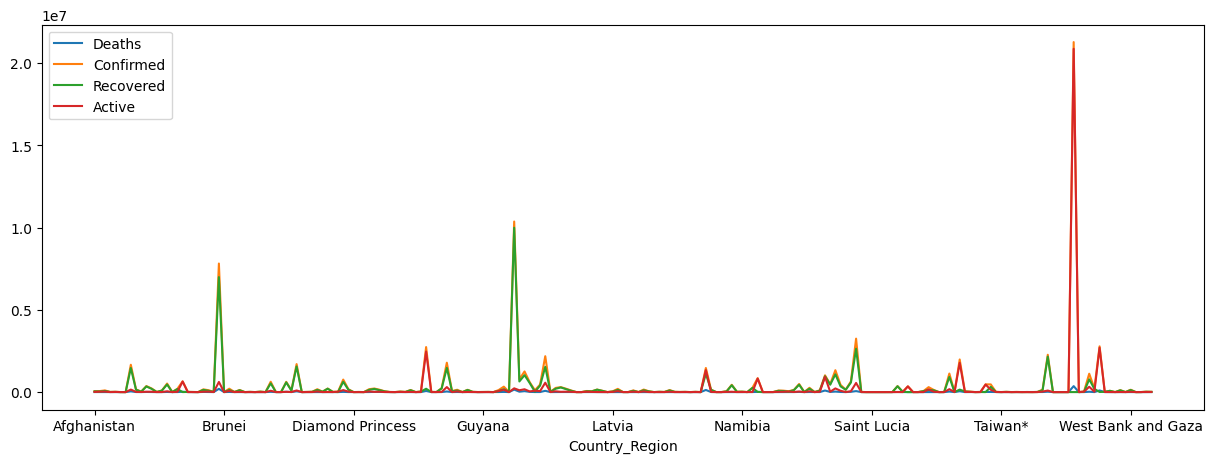

In [81]:
data4[data4['Deaths']>50000]
data4.shape
data4.plot(x='Country_Region',y=['Deaths','Confirmed','Recovered','Active'],figsize=(15,5))
plt.show()

### Question 6

### Plot Province/State wise Deaths in USA

In [82]:
import plotly.express as px

In [83]:
covid_data= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-09-2021.csv')

In [84]:
covid_data.columns


Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')

In [85]:
usa_data=covid_data[covid_data['Country_Region']=='US']
usa_death_data=usa_data.groupby('Province_State').Deaths.sum().reset_index()
chart=px.bar(usa_death_data,x='Province_State',y='Deaths')
chart.show()


### Question 7

### Plot Province/State Wise Active Cases in USA

In [86]:
usa_active_data=usa_data.groupby('Province_State').Active.sum().reset_index()
chart=px.bar(usa_active_data,x='Province_State',y='Active')
chart.show()

### Question 8

### Plot Province/State Wise Confirmed cases in USA

In [87]:
usa_data

df =usa_data.groupby(['Province_State']).Confirmed.sum().reset_index()
df2= usa_data.groupby(['Province_State']).Deaths.sum().reset_index()
df3= usa_data.groupby(['Province_State']).Recovered.sum().reset_index()
df4 = usa_data.groupby(['Province_State']).Active.sum().reset_index()

data2= pd.merge(df,df2,on='Province_State')
data3=pd.merge(data2,df3,on='Province_State')
data4=pd.merge(data3,df4,on='Province_State')

data4

import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='Confirmed', x=data4['Province_State'], y=data4['Confirmed'], text=data4['Confirmed']),
    go.Bar(name='Active', x=data4['Province_State'], y=data4['Active'], text=data4['Active']),
    go.Bar(name='Deaths', x=data4['Province_State'], y=data4['Deaths'],text=data4['Deaths']),
    go.Bar(name='Recoverd', x=data4['Province_State'], y=data4['Recovered'],text=data4['Recovered']),
])
# Change the bar mode
fig.update_layout(title='USA state wise combined no, of Confiremed,Deaths,Active,Recoverd',xaxis=dict(title='Province_State'),yaxis=dict(title='Count'),barmode='group')

fig.show()

### Question 9

### Plot Worldwide Confirmed Cases over time

In [88]:
import plotly.express as px
import plotly.io as pio

In [89]:
df =data.groupby(['Country_Region','Last_Update']).Confirmed.sum().reset_index()
df
time_chart=px.line(df,x='Last_Update',y='Confirmed',title='worldwide confirmed covid cases over time')
time_chart.show()